In [ ]:
from google.colab import drive
# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas
train_df = pandas.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset/titanic_train.csv")

**Which features are available in the dataset?**

In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**What do we have to predict?**

*HINT:* Check *titanic_test.csv*

Learn more about the dataset
https://www.kaggle.com/c/titanic/data

**Which features are categorical?**

In [ ]:
# Categorical: Survived, Sex, and Embarked. 
# Ordinal: Pclass

**Which features are numerical?**

In [ ]:
# Continous: Age, Fare. 
# Discrete: SibSp, Parch.

**Analysing The Features**

In [ ]:
train_df.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**Checking for NULL Values**

In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handling Missing Values**

In [ ]:
#using mean value to fill missing values
mean_value=train_df['Age'].mean()
train_df['Age']=train_df['Age'].fillna(mean_value)

In [ ]:
#using median value to fill missing values
median_value=train_df['Age'].median()
train_df['Age']=train_df['Age'].fillna(median_value)

**Feature Selection**

Understanding the Features?

# Using Visualizations to understand features

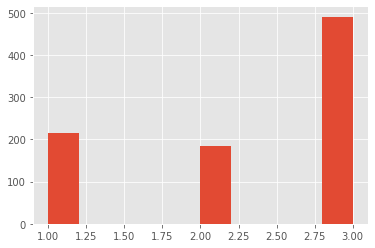

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.hist(train_df['Pclass'] )

plt.show()

In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Pclass,Survived
2,3,491
0,1,216
1,2,184


In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,male,577
0,female,314


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).count().sort_values(by='Survived', ascending=False)

,SibSp,Survived
0,0,608
1,1,209
2,2,28
4,4,18
3,3,16
6,8,7
5,5,5


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).count().sort_values(by='Survived', ascending=False)

,Parch,Survived
0,0,678
1,1,118
2,2,80
3,3,5
5,5,5
4,4,4
6,6,1


Multi Variate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


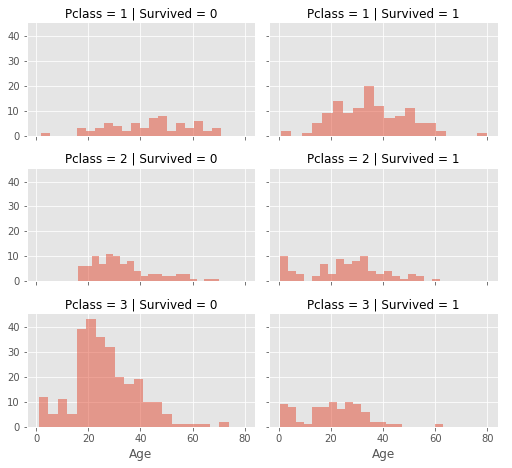

In [ ]:
import seaborn as sns
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
plt.show()